# Simple Convolutional Neural Network implementation with Keras


### THE MNIST database of handwritten digits <br>
##### The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.[3][4] It was created by "re-mixing" the samples from NIST's original datasets.
Source: http://yann.lecun.com/exdb/mnist/

### 1. Import the required libraries

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist # mnist dataset from keras
from keras.models import Sequential # to define a model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten 
from keras.utils import np_utils # to preprocess the data

## 2. Load the MNIST dataset

X_train shape:  (60000, 28, 28)
Y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)


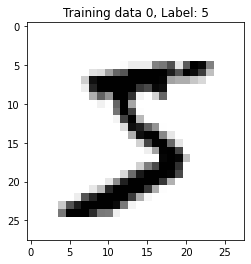

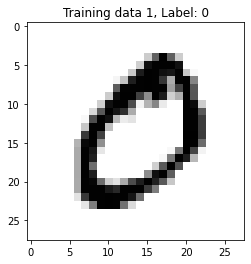

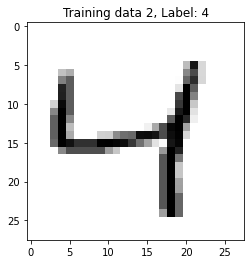

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Shape of the data
print('X_train shape: ', x_train.shape)
print('Y_train shape: ', y_train.shape)
print('X_test shape: ', x_test.shape)
print('Y_test shape: ', y_test.shape)

# visualizin the MNIST data
# plot first few images
for i in range(3):
    image = x_train[i]
    label = y_train[i]
    plt.title("Training data %d, Label: %d"%(i, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# show the figure
plt.show() 

## 3. Data Preprocessing - reshaping and rescaling.

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

x_train_fmt = x_train.astype('float32')
x_test_fmt = x_test.astype('float32')

# Rescaling
x_train_fmt /= 255
x_test_fmt /= 255

# Make sure images have shape (28, 28, 1)
x_train_fmt = np.expand_dims(x_train_fmt, -1)
x_test_fmt = np.expand_dims(x_test_fmt, -1)

print("Training matrix shape: ", x_train_fmt.shape)
print("Testing matrix shape: ", x_test_fmt.shape)

Training matrix shape:  (60000, 28, 28, 1)
Testing matrix shape:  (10000, 28, 28, 1)


#### Converting the target values into categorical values

In [4]:
# One Hot Encoding of labels
print("Shape of y_train before encoding: ", y_train.shape)
y_train_fmt = np_utils.to_categorical(y_train, num_classes)
y_test_fmt = np_utils.to_categorical(y_test, num_classes)
print("Shape of y_train after One Hot encoding: ", y_train_fmt.shape)

Shape of y_train before encoding:  (60000,)
Shape of y_train after One Hot encoding:  (60000, 10)


## 4. Build and train the model

In [5]:
# Building the model
def build_model():
    model = Sequential()
    # Convolution layer 1
    model.add(Conv2D(32, kernel_size =(5, 5), activation ='relu', input_shape=input_shape)) 
    # Convolution layer 2
    model.add(Conv2D(64, (5, 5), activation ='relu')) 
    # Max pooling layer
    model.add(MaxPooling2D(pool_size =(2, 2))) 
    # Convolution layer 3
    model.add(Conv2D(32, kernel_size =(3, 3), activation ='relu')) 
    # Convolution layer 4
    model.add(Conv2D(64, (3, 3), activation ='relu')) 
    # Max pooling layer
    model.add(MaxPooling2D(pool_size =(2, 2))) 
    model.add(Flatten()) 
    # Fully Connected layers
    model.add(Dense(512, activation ='relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(128, activation ='relu')) 
    # Output layer
    model.add(Dense(num_classes, activation ='softmax')) 
    return model

  
model = build_model()

In [6]:
# Model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [7]:
# Compiling the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
             metrics=['accuracy'])

# Training the model
history = model.fit(x_train_fmt, y_train_fmt,
         batch_size=128,
         epochs=5,
         verbose=1)

Epoch 1/5
469/469 [==============================] - 230s 490ms/step - loss: 0.2194 - accuracy: 0.9301
Epoch 2/5
469/469 [==============================] - 230s 491ms/step - loss: 0.0558 - accuracy: 0.9832
Epoch 3/5
469/469 [==============================] - 230s 490ms/step - loss: 0.0409 - accuracy: 0.9882
Epoch 4/5
469/469 [==============================] - 229s 488ms/step - loss: 0.0332 - accuracy: 0.9904
Epoch 5/5
469/469 [==============================] - 229s 488ms/step - loss: 0.0270 - accuracy: 0.9920


## 5. Model metrics

In [8]:
# Evaluating the model
score = model.evaluate(x_test_fmt, y_test_fmt, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02861388772726059
Test accuracy: 0.9908000230789185


## Model Predictions

In [9]:
predictions = model.predict(x_test_fmt)

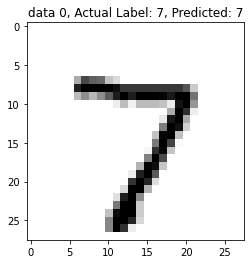

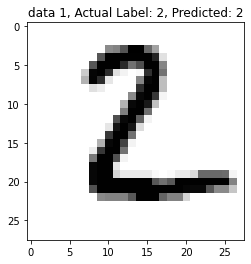

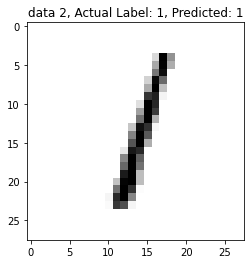

In [10]:
for i in range(3):
  image = x_test[i]
  label = y_test[i]
  plt.title("data %d, Actual Label: %d, Predicted: %d"%(i, label, np.argmax(predictions[i])))
  plt.imshow(image, cmap='gray_r')
  plt.show()